<a href="https://colab.research.google.com/github/udaypratapyati/Insaid_MachineLearning/blob/master/02_Demo_of_K_means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Demonstration for K-means Algorithm

#### PROBLEM STATEMENT ---- CREDIT CARD EXAMPLE

We want to try to divide the pool of customers in some groups which shows similarity within the group; and are different from others.
    
We can use this analysis to sell different types of Credit Cards to them.
    
The project will help us incerese our business.

In [0]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline

    Because no company will give us their propritary data; we will have to
    create a sample data for ourselves.
    
    Lets create a data set for 
    600 customers
    
    and have 2 features about them:
        1. Travel_Factor : A measure of how much they like to travel
        2. Shoping_Factor : A measure of how much they like to shop

In [0]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([7,8])
center_3 = np.array([6,1.5])
center_4 = np.array([2.6,6])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data_4 = np.random.randn(200,2) + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
# print(data)

 Lets see how to data looks like

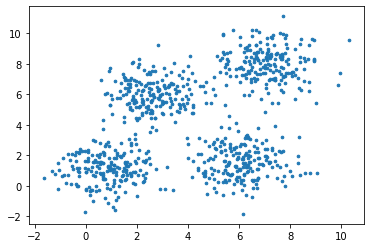

In [8]:
plt.scatter(data[:,0], data[:,1], s=7)

As we know, in K-means algorithm, we need to have a pre-decided k value.
    
So lets assume some value of K.
    
Lets see how the initial K centers will be look like along the data.

[[5.53687791 4.75217498]
 [7.66495195 1.97762744]
 [8.05866639 2.00612447]
 [1.47196208 6.53566329]]


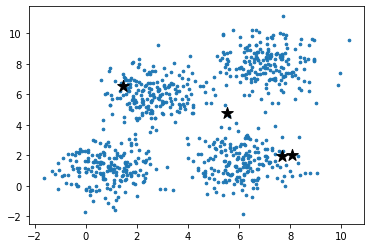

In [12]:
# Number of clusters
k = 4
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

print(centers)
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='black', s=150)


No lets code for the Algorithm.
We will keep track of:
  1. old and new centers
  2. distance of all points from centres
  3. Which group the customer belon in
  4. the measure of movement in centres.

In [18]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)
print(error)

15.157535727698559


When, after an update, the estimate of that center stays the same, 
    we need to stop the itteration and we have received our final groups.

####  Plot the data and the centers generated as random

15


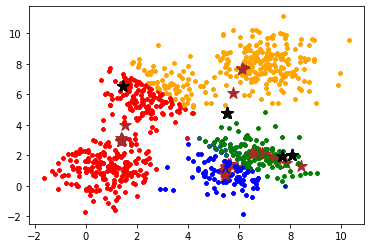

In [19]:
count = 0
while error != 0:

    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)

    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    colors=['orange', 'blue', 'green','red']
    centers_old = deepcopy(centers_new)

    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    centers_new   
    count = count + 1

    #plot the scatter plot
    for j in range(n):
        plt.scatter(data[j, 0], data[j,1], s=7, color = colors[int(clusters[j])])

    plt.scatter(centers[:,0], centers[:,1], marker='*', c='black', s=150)
    plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c= "brown", s=150)    
    


print(count)


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [29]:
path = '/content/drive/My Drive/INSAID/MachineLearning/07.K-Means Clustering/class-material-customers-200127-133003.csv'
customers = pd.read_csv(path)
customers.rename({'CustomerID':'ID', 'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, axis=1, inplace=True)
customers.head()

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


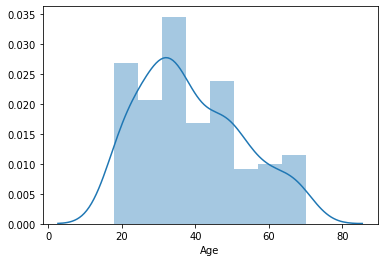

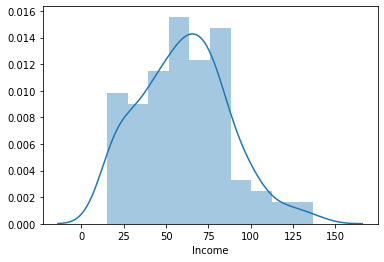

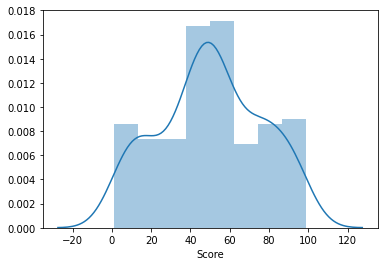

In [30]:
import seaborn as sns
cols = ['Age', 'Income', 'Score']
for i, col in enumerate(cols):
  plt.figure(i)
  sns.distplot(customers[col], hist=True)

In [37]:
from scipy.stats import boxcox
X = customers[cols]
for c in cols:
  X[c], _ = boxcox(X[c])

X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,Income,Score
0,3.691442,7.409624,24.128630
1,3.847430,7.409624,45.328722
2,3.771098,7.793130,4.135102
3,3.991239,7.793130,43.408853
4,4.476951,8.168337,24.667863


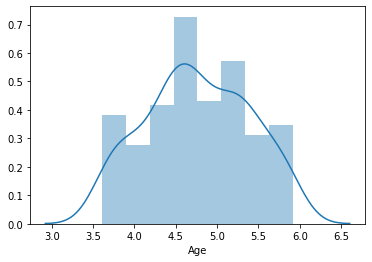

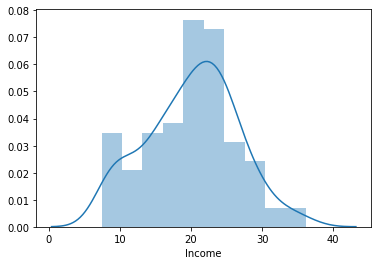

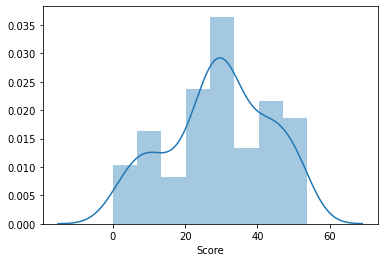

In [39]:
for i, col in enumerate(cols):
  plt.figure(i)
  sns.distplot(X[col], hist=True)

In [0]:
# from scipy.stats import zscore
# X_std = zscore(X)
# X_std = np.array(X_std)

# for i, col in enumerate(cols):
#   plt.figure(i)
#   sns.distplot(X_std[3], hist=True)

In [79]:
X.max()

Age       4.248495
Income    4.919981
Score     4.595120
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


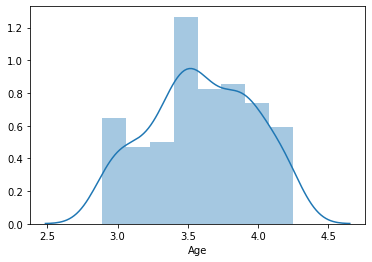

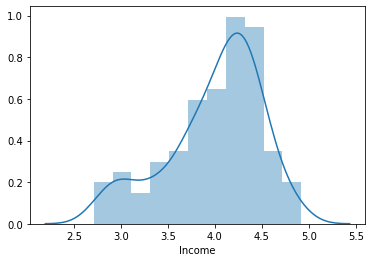

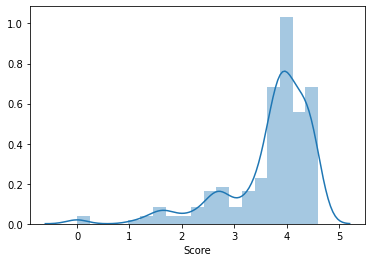

In [76]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = customers[cols]

# X = pd.DataFrame(scalar.fit_transform(X), columns=cols)

for c in cols:
  X[c] = np.log(X[c])

for i, col in enumerate(cols):
  plt.figure(i)
  sns.distplot(X[col], hist=True)

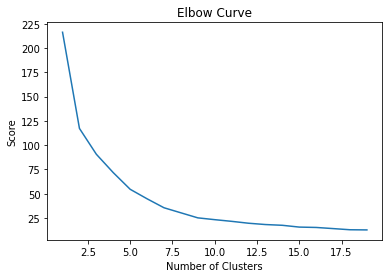

In [87]:
from sklearn.cluster import KMeans
import pylab as pl
clusters = range(1,20)
models = [KMeans(n_clusters=i, max_iter=1000) for i in clusters]
scores = [-1*models[i].fit(X).score(X)  for i in range(len(models))]

pl.plot(clusters, scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [88]:
model = KMeans(n_clusters=6, max_iter=1000)
model.fit(X).score(X)

-44.74857222671001

In [91]:
X['labels'] = model.labels_
# X.groupby('labels').size()
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Income,Score,labels
0,2.944439,2.708050,3.663562,5
1,3.044522,2.708050,4.394449,5
2,2.995732,2.772589,1.791759,3
3,3.135494,2.772589,4.343805,5
4,3.433987,2.833213,3.688879,5


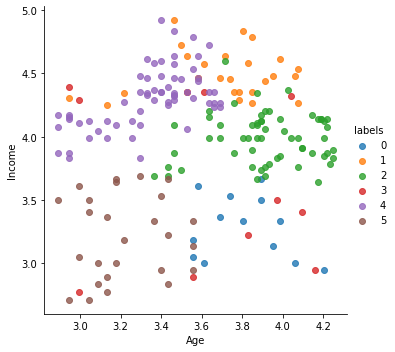

In [93]:
sns.lmplot('Age', 'Income',data=X, hue='labels',fit_reg=False)
# plt.show()

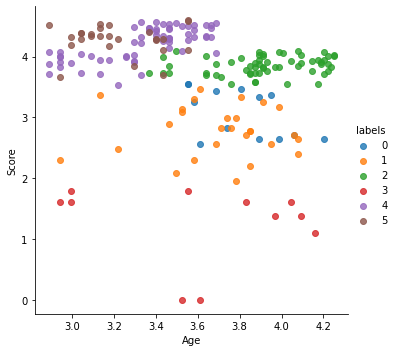

In [94]:
sns.lmplot('Age', 'Score',data=X, hue='labels',fit_reg=False)

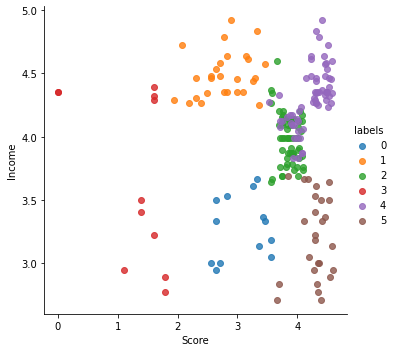

In [95]:
sns.lmplot('Score', 'Income',data=X, hue='labels',fit_reg=False)

In [96]:
path = '/content/drive/My Drive/INSAID/MachineLearning/07.K-Means Clustering/Practice-dataset-forclustering-1569579016600.xlsx'
practise_data = pd.read_excel(path, sheet_name='data')
practise_data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


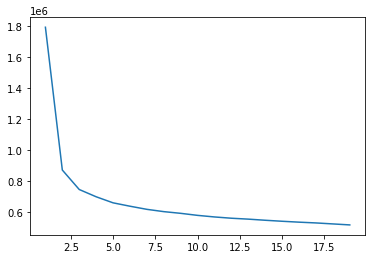

In [102]:
X = practise_data  # all numerical cols

clusters = range(1,20)
scores = []
for i in clusters:
    scores.append(-1 * KMeans(n_clusters=i, max_iter=500).fit(X).score(X))

pl.plot(clusters, scores)    

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm

#Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

#Scale the variables and load into 'X'
from sklearn.preprocessing import scale
X = scale(iris.data)

#Assign target values to 'y'
y = pd.DataFrame(iris.target)

#Create an object for our variable names
variable_names = iris.feature_names

#Print first 10 records
print(X[0:10,])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [108]:
#Import KMeans model and instantiate it.
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=5)

#Use fit method to create a model
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

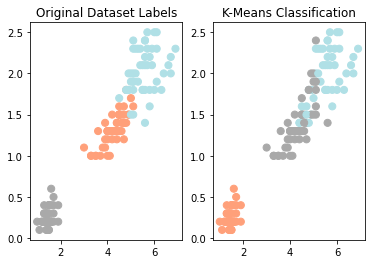

In [109]:
#Create dataframe for original data comparison with model prediction
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

#Set a variable color_theme to color our data points by their species label. 
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

#Set the color_theme as per original dataset labels 'iris.target'.
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Original Dataset Labels')

#Change the color_theme as per the labels that were predicted by our clustering model.
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')
plt.show()

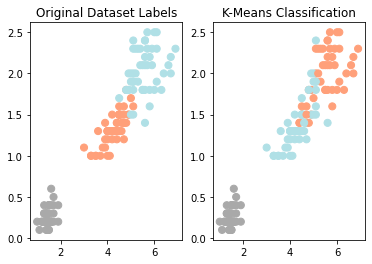

In [113]:
#Create dataframe for original data comparison with model prediction
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

#Set a variable color_theme to color our data points by their species label. 
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Original Dataset Labels')

#Change the color_theme as per the new object 'relabel'.
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')
plt.show()